<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/wtss.png?raw=true" align="right" width="64"/>

# <span style="color:#336699">Introduction to the Web Time Series Service (WTSS)</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/wtss/wtss-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Raphael Costa, Matheus Zaglia<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Abner dos Anjos, Rennan F. B. Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: June 14, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the WTSS service to extract time series from <em>Earth Observation Data Cubes</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Vinhas, L.; Queiroz, G. R.; Ferreira, K. R.; Camara, G. <a href="http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004" target="_blank">Web Services for Big Earth Observation Data</a>. Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.
    </div>
</div>

# Introduction
<hr style="border:1px solid #0077b9;">

The **W**eb **T**ime **S**eries **S**ervice (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. Given a location and a time interval you can retrieve the according time series as a list of real values.


In WTSS a coverage is a three dimensional array associated to spatial and temporal reference systems.

WTSS is based on three operations:

- ``list_coverages``: returns the list of all available coverages in the service.

- ``describe_coverage``: returns the metadata of a given coverage.

- ``time_series``: query the database for the list of values for a given location and time interval.

This Jupyter Notebook shows how to use WTSS in Python with Brazil Data Cube data.

## Operations
<hr style="border:1px solid #0077b9;">

This service is composed by three operations (Figure 2):

<div align="center">
    <figcaption><strong>Figure 2</strong> - WTSS Operations</figcaption>
    <img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/wtss-operations.png?raw=true" align="center" width="768"/>
    <br>
    <strong>Source</strong>: Adapted from <i>et al.</i> (2017)
</div>

- ``list_coverages``: Lists the available *coverages* names on the service;

- ``describe_coverage``: recovers the metadata of a *coverage*;

- ``time_series``: Extracts time series from a *coverage* given a location on time and space.

> The complete description of the input and output formats of each operation are detailed in [WTSS OpenAPI 3.0 specification](https://github.com/brazil-data-cube/wtss-spec).

> You can also consult the WTSS clients for [Python](https://github.com/brazil-data-cube/wtss.py) and [R](https://github.com/e-sensing/Rwtss).


# Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [WTSS client for Python](https://github.com/brazil-data-cube/wtss.py). To install it from PyPI using `pip`, use the following command:

In [55]:
!pip install git+https://github.com/brazil-data-cube/wtss.py@b-0.7

  Cloning https://github.com/brazil-data-cube/wtss.py (to revision b-0.7) to /tmp/pip-req-build-t7vw3qa2
  Running command git clone --filter=blob:none --quiet https://github.com/brazil-data-cube/wtss.py /tmp/pip-req-build-t7vw3qa2
  Running command git checkout -b b-0.7 --track origin/b-0.7
  Switched to a new branch 'b-0.7'
  Branch 'b-0.7' set up to track remote branch 'b-0.7' from 'origin'.
  Resolved https://github.com/brazil-data-cube/wtss.py to commit 9d4922827da0978e80f57f01633eebf23fb37daa
  Preparing metadata (setup.py) ... done


In order to access the funcionalities of the client API, you should import the `wtss` package, as follows:

In [56]:
from wtss import *

After that, you should create a `wtss` object attached to a given service:

In [57]:
service = WTSS('https://data.inpe.br/bdc/wtss/v4/')

The above cell will create an object named `service` that will allow us to comunicate to the given WTSS service.

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/list-coverages.png?raw=true" align="right" width="220"/>

# Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

The object `service` allows to list the available coverages:

In [58]:
service.coverages

['mod13q1-6.0', 'myd13q1-6.0', 'S2-16D-2']

The names returned by this property can be used in subsequent operations.

The complete `WTSS` class is documented [here](https://wtss.readthedocs.io/en/latest/class_wtss.html).

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/describe-coverage.png?raw=true" align="right" width="220"/>

# Retrieving the Metadata of a Data Product
<hr style="border:1px solid #0077b9;">

It is possible to access the metadata of a specific coverage with the `operator[]`:

In [59]:
service['S2-16D-2']

name,common name,description,datatype,valid range,scale,nodata
CLEAROB,ClearOb,,uint8,"{'min': 1.0, 'max': 255.0}",1.0,0.0
TOTALOB,TotalOb,,uint8,"{'min': 1.0, 'max': 255.0}",1.0,0.0
PROVENANCE,Provenance,,int16,"{'min': 1.0, 'max': 366.0}",1.0,-1.0
SCL,quality,,uint8,"{'min': 0.0, 'max': 11.0}",1.0,0.0
B01,coastal,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B02,blue,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B04,red,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B05,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B06,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B07,rededge,,uint16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0


<div style="text-align: center;  margin-left: 25%; margin-right: 25%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> In Jupyter, you can use the <em>tab key</em> for auto-completition of the coverage name.
</div>

The coverage metadata data includes its range in the spatial and temporal dimensions, the list of attributes associated to the cells, and its associated timeline.


Let's inspect the metadata with more detail:

In [60]:
coverage = service['S2-16D-2']

In [61]:
coverage.name

'S2-16D-2'

In [62]:
coverage.description

'Earth Observation Data Cube generated from Copernicus Sentinel-2/MSI Level-2A product over Brazil. This dataset is provided in Cloud Optimized GeoTIFF (COG) file format. The dataset is processed with 10 meters of spatial resolution, reprojected and cropped to BDC_SM grid Version 2 (BDC_SM V2), considering a temporal compositing function of 16 days using the Least Cloud Cover First (LCF) best pixel approach.'

In [63]:
coverage.attributes

[{'name': 'CLEAROB',
  'description': '',
  'datatype': 'uint8',
  'valid_range': {'min': 1.0, 'max': 255.0},
  'common_name': 'ClearOb',
  'scale_factor': 1.0,
  'missing_value': 0.0},
 {'name': 'TOTALOB',
  'description': '',
  'datatype': 'uint8',
  'valid_range': {'min': 1.0, 'max': 255.0},
  'common_name': 'TotalOb',
  'scale_factor': 1.0,
  'missing_value': 0.0},
 {'name': 'PROVENANCE',
  'description': '',
  'datatype': 'int16',
  'valid_range': {'min': 1.0, 'max': 366.0},
  'common_name': 'Provenance',
  'scale_factor': 1.0,
  'missing_value': -1.0},
 {'name': 'SCL',
  'description': '',
  'datatype': 'uint8',
  'valid_range': {'min': 0.0, 'max': 11.0},
  'common_name': 'quality',
  'scale_factor': 1.0,
  'missing_value': 0.0},
 {'name': 'B01',
  'description': '',
  'datatype': 'uint16',
  'valid_range': {'min': 0.0, 'max': 10000.0},
  'common_name': 'coastal',
  'scale_factor': 0.0001,
  'missing_value': 0.0},
 {'name': 'B02',
  'description': '',
  'datatype': 'uint16',
  'v

In [64]:
coverage.dimensions

{'x': {'name': 'col_id', 'min_idx': 1, 'max_idx': 10560},
 'y': {'name': 'row_id', 'min_idx': 1, 'max_idx': 10560},
 't': {'name': 'time_id', 'min_idx': 1, 'max_idx': 171}}

In [65]:
coverage.spatial_extent

{'xmin': -74.871069,
 'ymin': -34.67556459214432,
 'xmax': -28.006208041654325,
 'ymax': 5.763264005526926}

In [66]:
timeline = coverage.timeline

start = timeline[0]
end = timeline[-1]

print(f'Interval range: [{start}, {end}]')

Interval range: [2018-01-01, 2024-05-08]


The complete `Coverage` class is documented [here](https://wtss.readthedocs.io/en/latest/class_coverage.html).

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/time-series.png?raw=true" align="right" width="220"/>

# Retrieving the Time Series
<hr style="border:1px solid #0077b9;">

In order to retrieve the time series for attributes `red` and `nir`, in the location of `latitude -12` and `longitude -54` from `January 1st, 2019` to `December 31st, 2019`, use the `ts` method:

In [67]:
ts = coverage.ts(attributes=('B04', 'B08'),
                 latitude=-9.41866, longitude=-61.46103,
                 start_date='2019-01-01', end_date='2019-12-31')

In [68]:
ts

Time Series S2-16D-2
 
 
 
 
 B04: [312, 441, 1800, 3154, 294, 901, 333, 285, 143, 167, 129, 183, 148, 747, 745, 674, 673, 708, 415, 1083, 8071, 678, 3695]
 
 B08: [3897, 3964, 3908, 4831, 2759, 2114, 3221, 2362, 2774, 2630, 2638, 2601, 2552, 2356, 2146, 1077, 1035, 1003, 686, 1493, 7741, 1338, 4165]
 
 
 
 
 timeline 
 
 
 
 2019-01-01 2019-01-17 2019-02-02 2019-02-18 2019-03-06 2019-03-22 2019-04-07 2019-04-23 2019-05-09 2019-05-25 2019-06-10 2019-06-26 2019-07-12 2019-07-28 2019-08-13 2019-08-29 2019-09-14 2019-09-30 2019-10-16 2019-11-01 2019-11-17 2019-12-03 2019-12-19

Each time series can be accessed by the name of the attribute:

In [69]:
ts.B04

[312,
 441,
 1800,
 3154,
 294,
 901,
 333,
 285,
 143,
 167,
 129,
 183,
 148,
 747,
 745,
 674,
 673,
 708,
 415,
 1083,
 8071,
 678,
 3695]

In [70]:
ts.B08

[3897,
 3964,
 3908,
 4831,
 2759,
 2114,
 3221,
 2362,
 2774,
 2630,
 2638,
 2601,
 2552,
 2356,
 2146,
 1077,
 1035,
 1003,
 686,
 1493,
 7741,
 1338,
 4165]

It is also possible to access the time points associated to the values:

In [71]:
ts.timeline

['2019-01-01',
 '2019-01-17',
 '2019-02-02',
 '2019-02-18',
 '2019-03-06',
 '2019-03-22',
 '2019-04-07',
 '2019-04-23',
 '2019-05-09',
 '2019-05-25',
 '2019-06-10',
 '2019-06-26',
 '2019-07-12',
 '2019-07-28',
 '2019-08-13',
 '2019-08-29',
 '2019-09-14',
 '2019-09-30',
 '2019-10-16',
 '2019-11-01',
 '2019-11-17',
 '2019-12-03',
 '2019-12-19']

The complete `TimeSeries` class is documented [here](https://wtss.readthedocs.io/en/latest/class_timeseries.html).

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/wtss/visualizing-timeseries.png?raw=true" align="right" width="220"/>

# Visualizing the Time Series with Matplotlib
<hr style="border:1px solid #0077b9;">

If you have Matplotlib and Numpy installed, it is possible to plot the time series with the `plot` method:

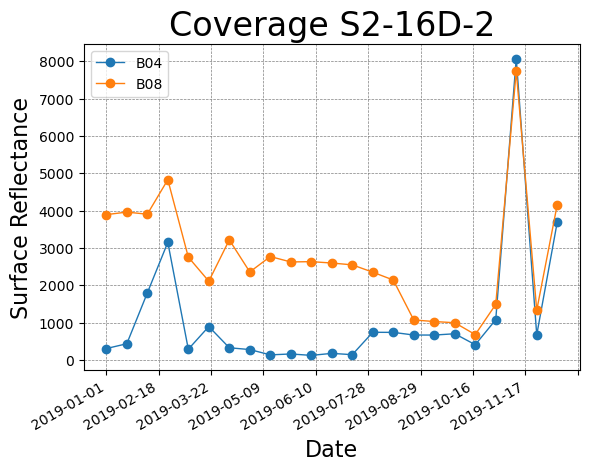

In [72]:
ts.plot()

# References
<hr style="border:1px solid #0077b9;">

- [Python Client Library for Web Time Series Service - User Guide](https://wtss.readthedocs.io/en/latest/index.html)


- [Python Client Library for Web Time Series Service - GitHub Repository](https://github.com/brazil-data-cube/wtss.py)


- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)


- VINHAS, L.; QUEIROZ, G. R.; FERREIRA, K. R.; CÂMARA, G. [Web Services for Big Earth Observation Data](http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004). Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [WTSS Examples](./wtss-examples.ipynb)